<a href="https://colab.research.google.com/github/marynell-rg/mfp/blob/main/Predicci%C3%B3n_de_fallas_de_una_m%C3%A1quina_industrial_Marynell_Romero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PREDICCIÓN DE FALLAS DE UNA MÁQUINA INDUSTRIAL

Se requiere predecir fallas en una máquina industrial utilizando datos recopilados por sensores. La predicción temprana de fallas permitirá implementar estrategias de mantenimiento preventivo, optimizar el tiempo de operación y reducir costos relacionados con reparaciones y tiempo de inactividad.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Obtención de los datos

In [ ]:
machine_data = pd.read_csv('Machine Failure Prediction using Sensor data.csv')

Al importar nuestros datos, tenemos la siguiente tabla:

In [ ]:
machine_data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


## Descripción de los atributos

**Descripción de las Columnas**


*   Footfall: El número de personas u objetos pasando cerca de la máquina.
*   TempMode: El modo o ajuste de la temperatura de la máquina.
*   AQ: índice de calidad del aire cerca de la máquina.
*   USS: Datos del sensor ultrasónico, indicando las mediciones de proximidad.
*   CS: Lecturas del sensor de corriente, que indican el uso de corriente eléctrica de la máquina.
*   VOC: Nivel de compuestos orgánicos volátiles detectado cerca de la máquina.
*   RP: Posición de rotación o RPM (revoluciones por minuto) de las piezas de la máquina.
*   IP: Presión de entrada a la máquina.
*   Temperature: La temperatura de operación de la máquina.
*   Fail: Indicador binario de falla de la máquina. (1 para falla, 0 para no falla).

# Analisis Exploratorio de los Datos

## Información sobre el Dataset

In [ ]:
machine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


## Estadística descriptiva

In [ ]:
#Estadística descriptiva
machine_data.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


## Visualización de las distribuciones

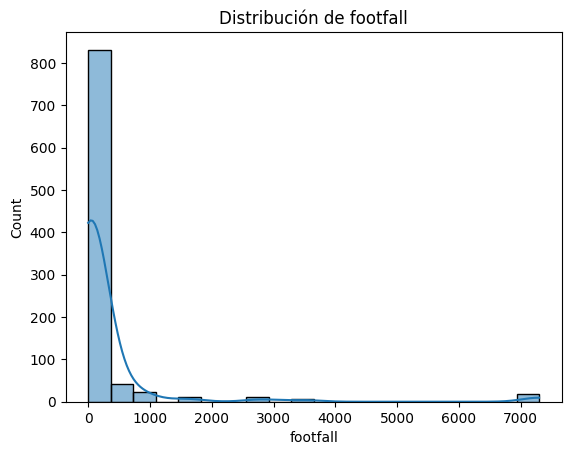

In [ ]:
#Visualización de las distribuciones

def histograma(data, variable, titulo):
  """
  Genera un histograma para una variable dada.

  Args:
    data: DataFrame de Pandas que contiene los datos.
    variable: Nombre de la columna (variable) a visualizar.
  """
  sns.histplot(data[variable], kde=True, bins=20)
  plt.title(titulo)
  plt.show()

#Para visualizar el hstograma creado
histograma(machine_data, 'footfall', 'Distribución de footfall')

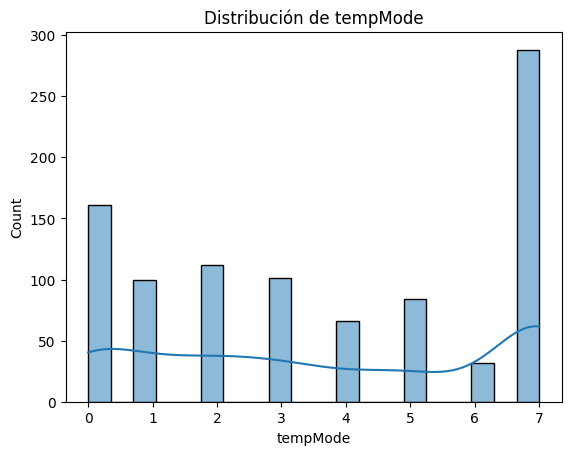

In [ ]:
histograma(machine_data, 'tempMode', 'Distribución de tempMode')

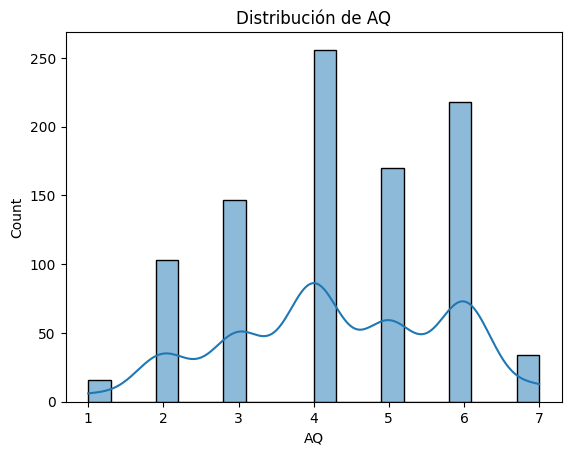

In [ ]:
histograma(machine_data, 'AQ', 'Distribución de AQ')

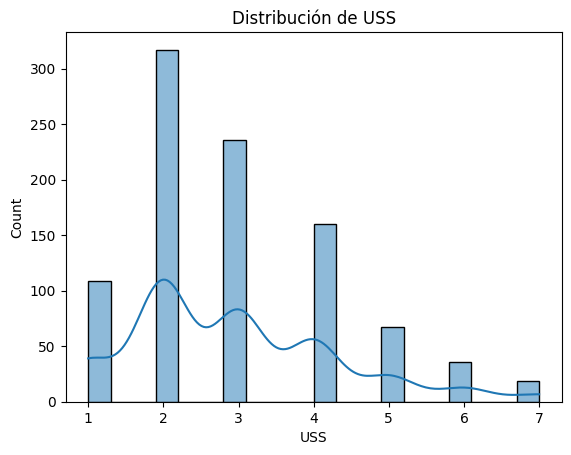

In [ ]:
histograma(machine_data, 'USS', 'Distribución de USS')

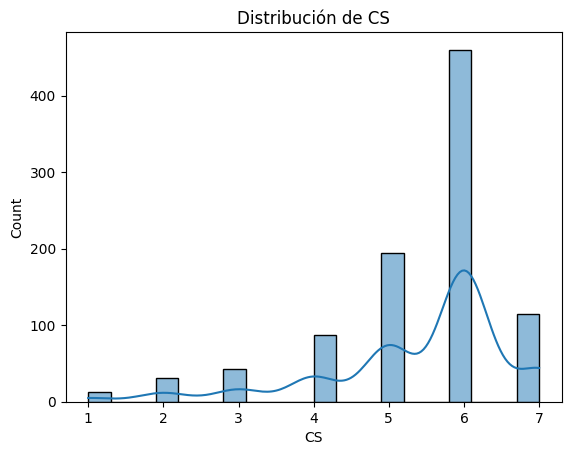

In [ ]:
histograma(machine_data, 'CS', 'Distribución de CS')

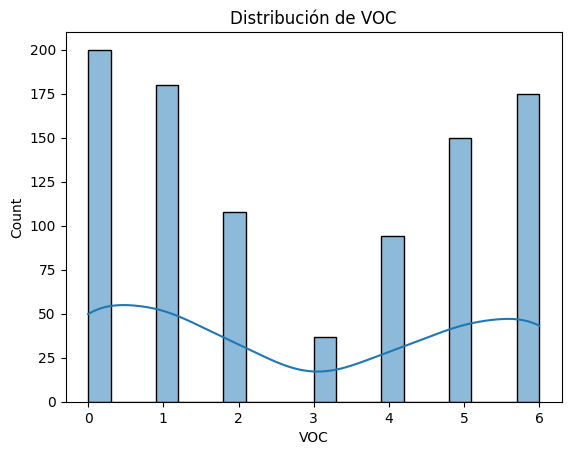

In [ ]:
histograma(machine_data, 'VOC', 'Distribución de VOC')

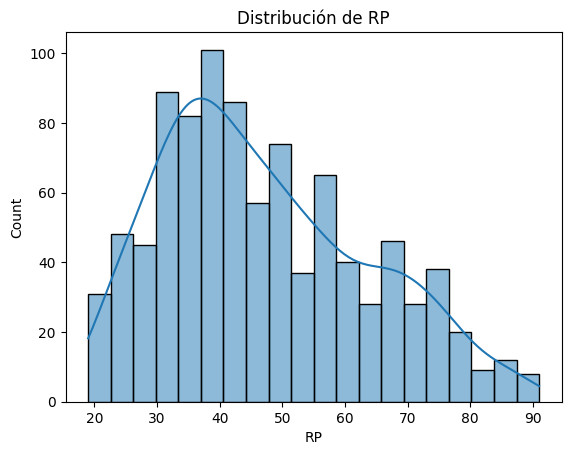

In [ ]:
histograma(machine_data, 'RP', 'Distribución de RP')

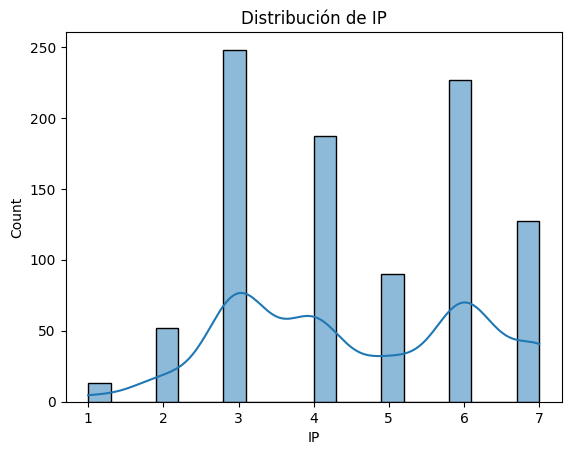

In [ ]:
histograma(machine_data, 'IP', 'Distribución de IP')

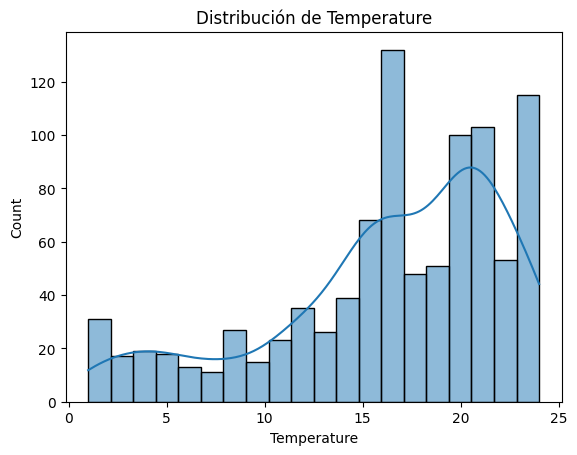

In [ ]:
histograma(machine_data, 'Temperature', 'Distribución de Temperature')

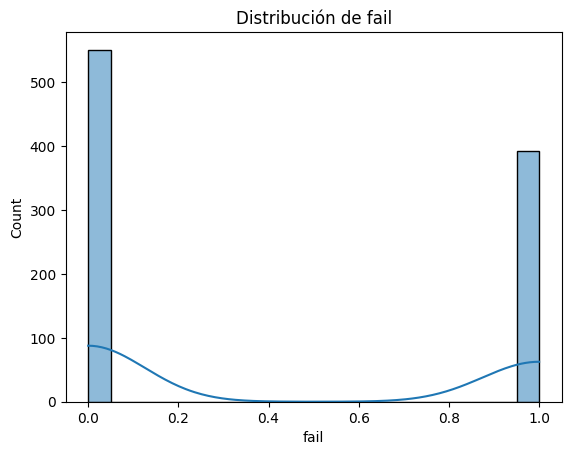

In [ ]:
histograma(machine_data, 'fail', 'Distribución de fail')

## Visualización de cada variable en un gráfico de bigote

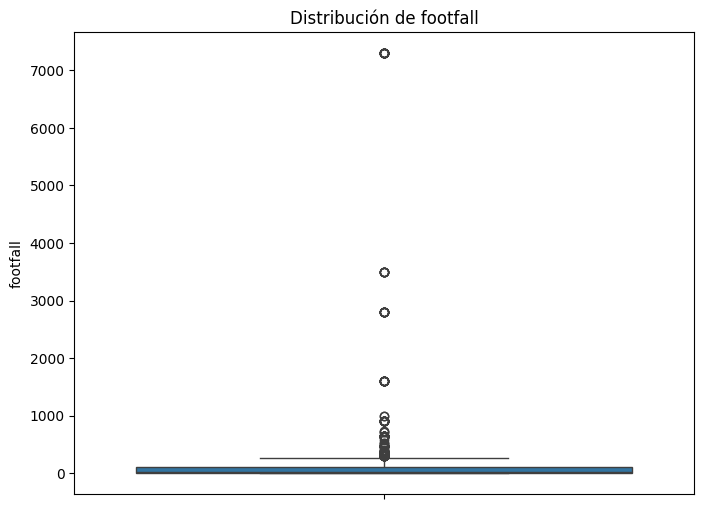

In [ ]:
def visualizar_boxplot(data, variable, titulo):
  """
  Genera un gráfico de bigote (boxplot) para una variable dada.

  Args:
    data: DataFrame de Pandas que contiene los datos.
    variable: Nombre de la columna (variable) a visualizar.
    titulo: Título del gráfico.
  """
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=variable, data=data)
  plt.title(titulo)
  plt.ylabel(variable)
  plt.show()

visualizar_boxplot(machine_data, 'footfall', 'Distribución de footfall')

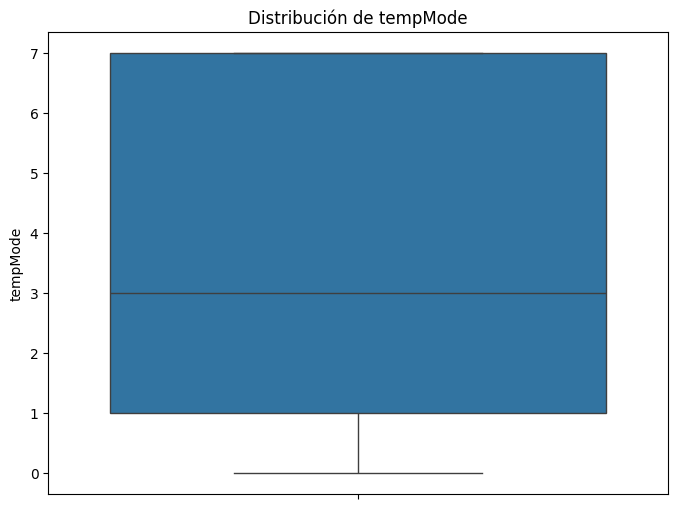

In [ ]:
visualizar_boxplot(machine_data, 'tempMode', 'Distribución de tempMode')

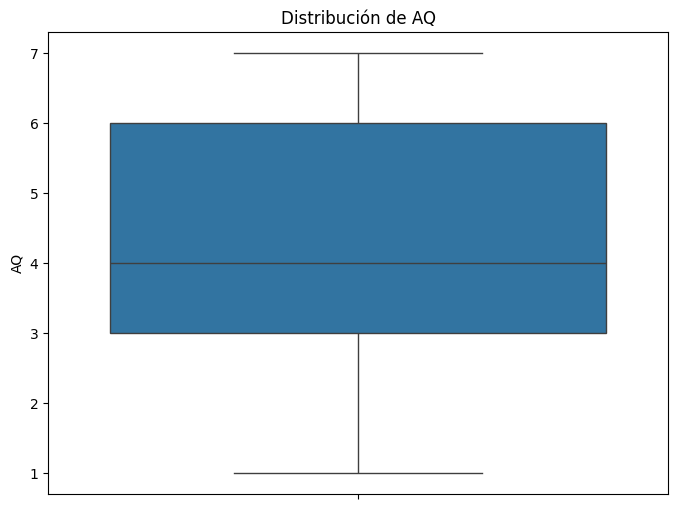

In [ ]:
visualizar_boxplot(machine_data, 'AQ', 'Distribución de AQ')

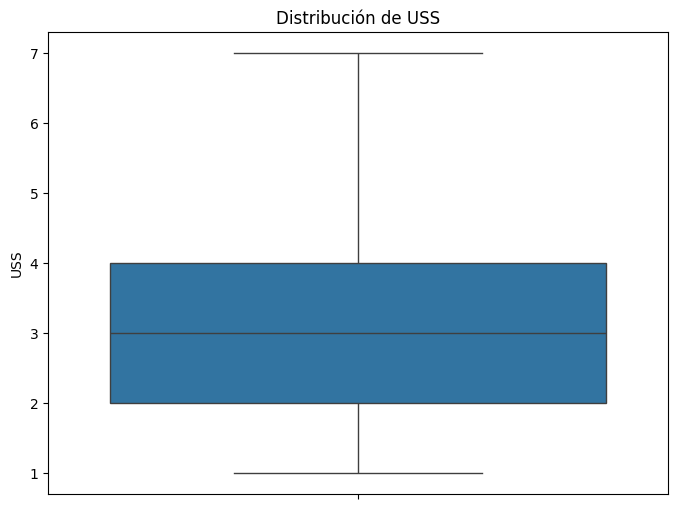

In [ ]:
visualizar_boxplot(machine_data, 'USS', 'Distribución de USS')

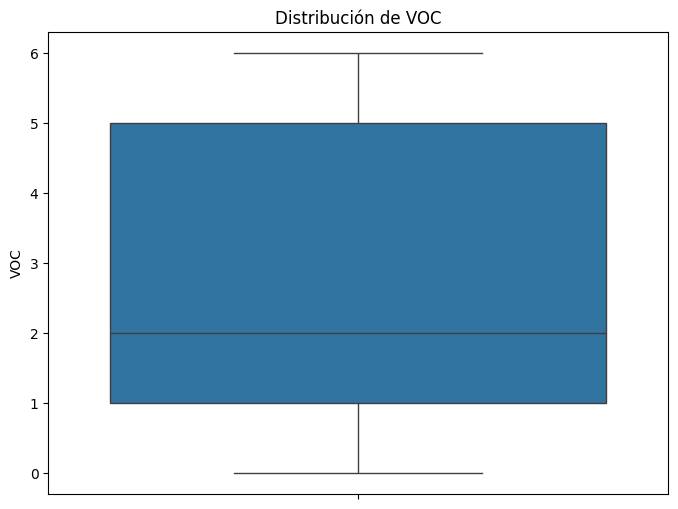

In [ ]:
visualizar_boxplot(machine_data, 'VOC', 'Distribución de VOC')

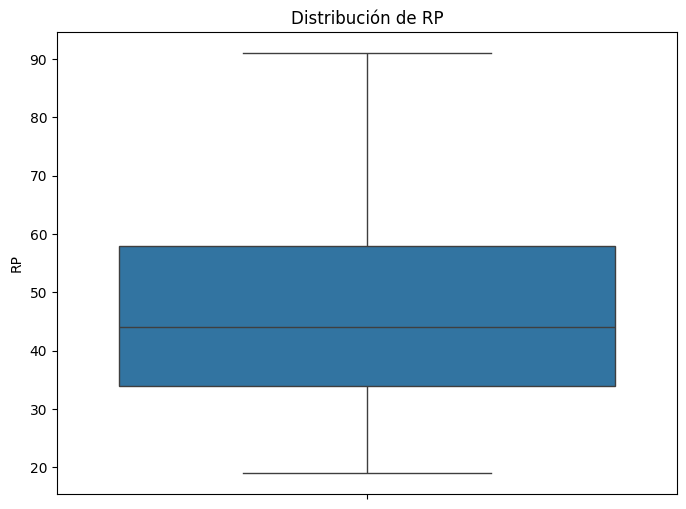

In [ ]:
visualizar_boxplot(machine_data, 'RP', 'Distribución de RP')

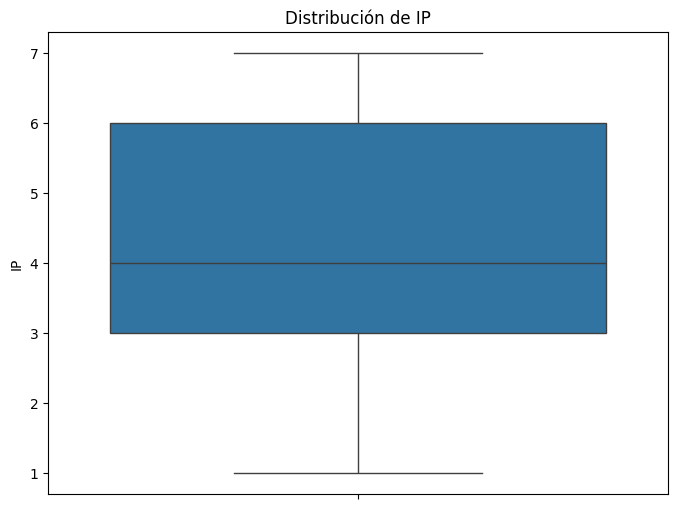

In [ ]:
visualizar_boxplot(machine_data, 'IP', 'Distribución de IP')

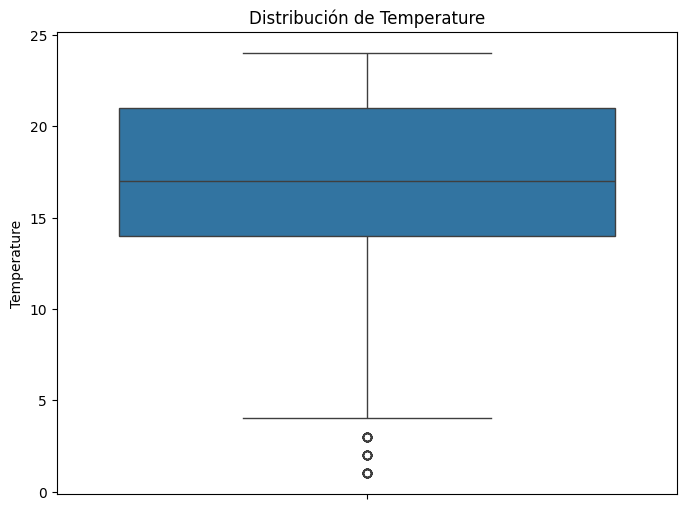

In [ ]:
visualizar_boxplot(machine_data, 'Temperature', 'Distribución de Temperature')

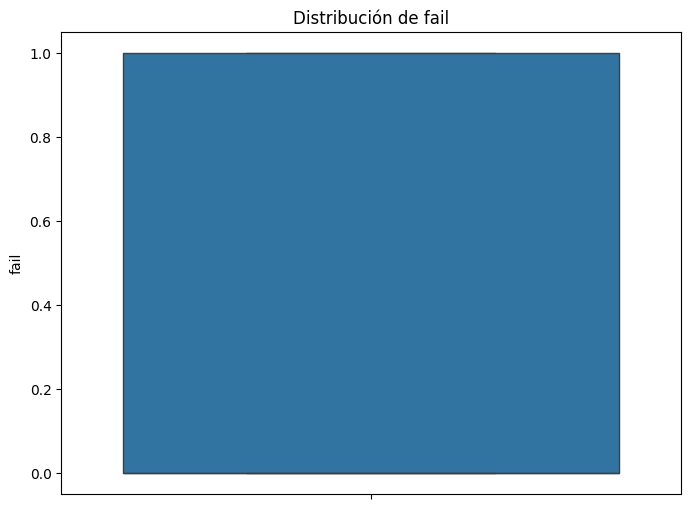

In [ ]:
visualizar_boxplot(machine_data, 'fail', 'Distribución de fail')

## Visualización de cada variable respecto a la falla de la máquina

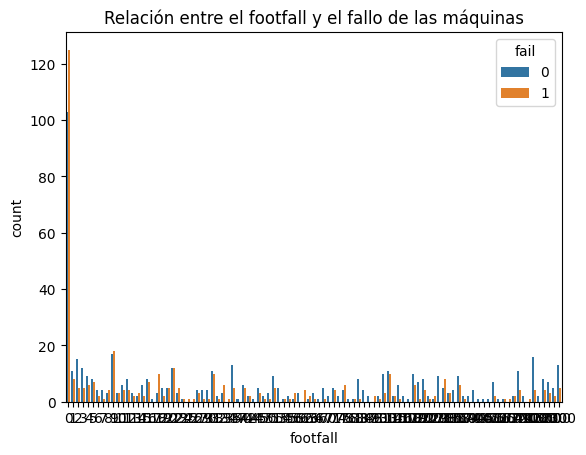

In [ ]:
#Visualización de cada variable respecto a la falla de las máquinas
def visualizar_barras(data, variable, titulo):
  """
  Genera un gráfico de barras para una variable dada.

  Args:
    data: DataFrame de Pandas que contiene los datos.
    variable: Nombre de la columna (variable) a visualizar.
    titulo: Título del gráfico.
  """
  sns.countplot(x=variable, data =data, hue= 'fail')
  plt.title(titulo)
  plt.show()

#Para visualizar el gráfico
visualizar_barras(machine_data, 'footfall', 'Relación entre el footfall y el fallo de las máquinas')

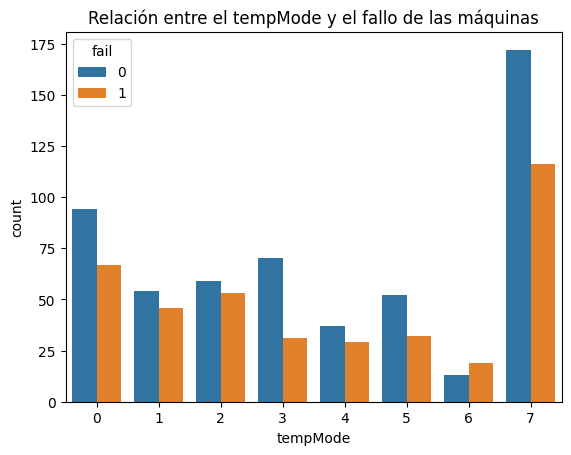

In [ ]:
visualizar_barras(machine_data, 'tempMode', 'Relación entre el tempMode y el fallo de las máquinas')

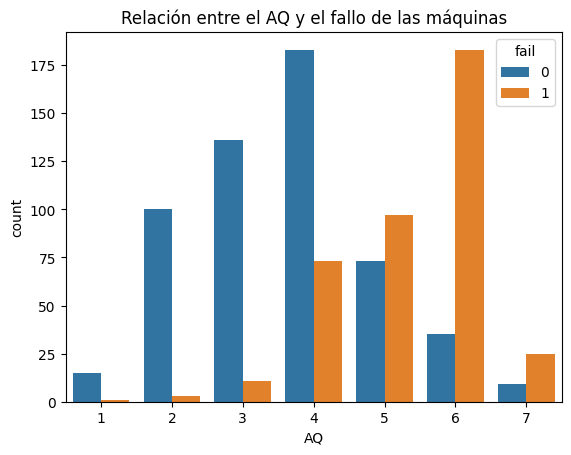

In [ ]:
visualizar_barras(machine_data, 'AQ', 'Relación entre el AQ y el fallo de las máquinas')

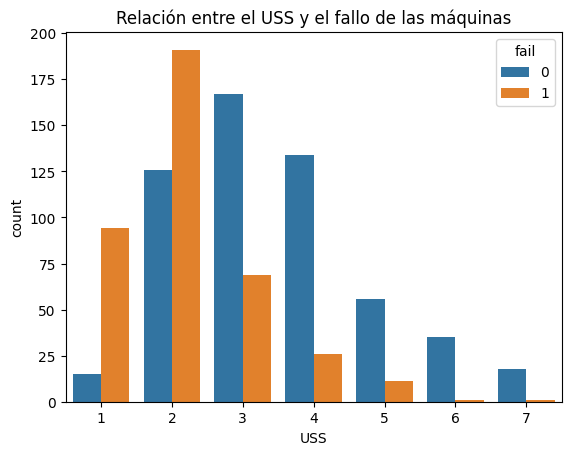

In [ ]:
visualizar_barras(machine_data, 'USS', 'Relación entre el USS y el fallo de las máquinas')

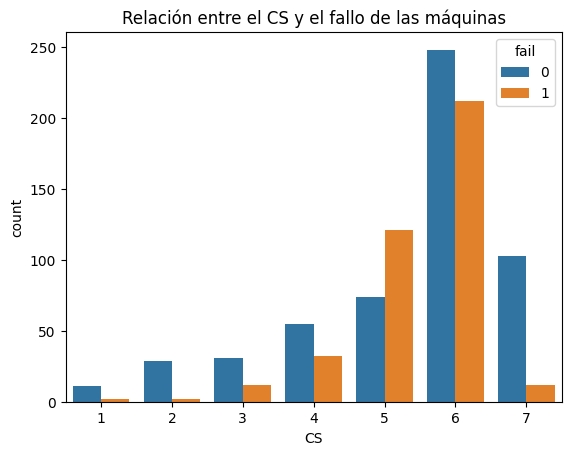

In [ ]:
visualizar_barras(machine_data, 'CS', 'Relación entre el CS y el fallo de las máquinas')

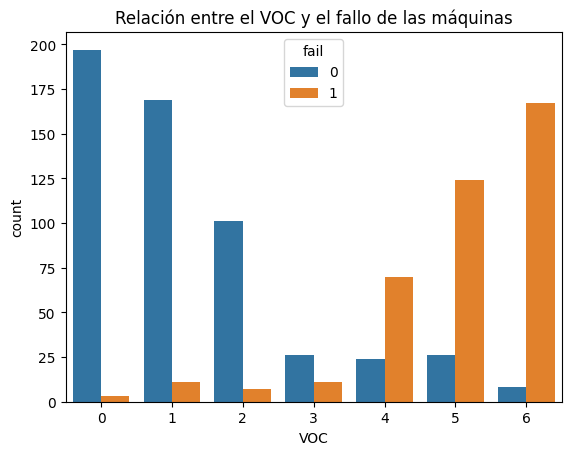

In [ ]:
visualizar_barras(machine_data, 'VOC', 'Relación entre el VOC y el fallo de las máquinas')

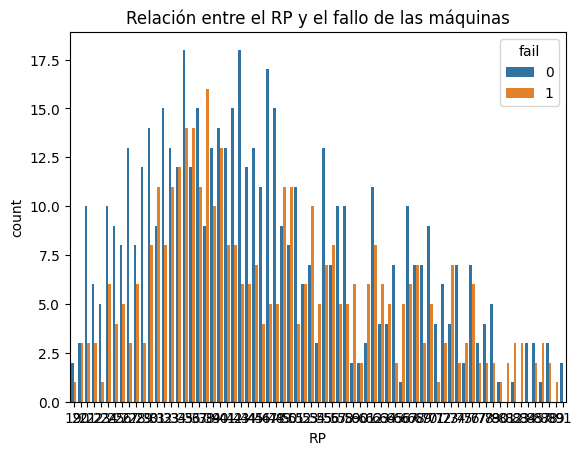

In [ ]:
visualizar_barras(machine_data, 'RP', 'Relación entre el RP y el fallo de las máquinas')

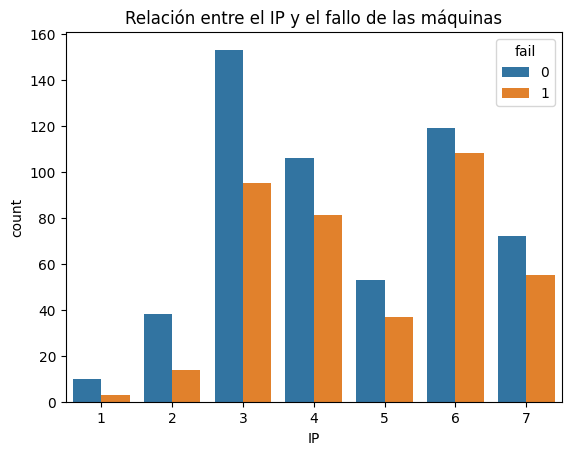

In [ ]:
visualizar_barras(machine_data, 'IP', 'Relación entre el IP y el fallo de las máquinas')

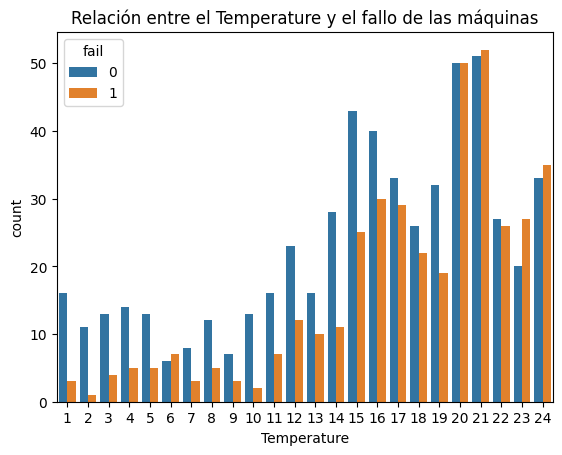

In [ ]:
visualizar_barras(machine_data, 'Temperature', 'Relación entre el Temperature y el fallo de las máquinas')

## Matriz de correlación

In [ ]:
#Matriz de Correlación
correlation_matrix = machine_data.corr()
print(correlation_matrix)

             footfall  tempMode        AQ       USS        CS       VOC  \
footfall     1.000000  0.020457 -0.065816  0.019453  0.025638 -0.089590   
tempMode     0.020457  1.000000 -0.010855  0.002142 -0.013956 -0.052369   
AQ          -0.065816 -0.010855  1.000000 -0.156884 -0.090010  0.618570   
USS          0.019453  0.002142 -0.156884  1.000000 -0.352915 -0.399477   
CS           0.025638 -0.013956 -0.090010 -0.352915  1.000000  0.048037   
VOC         -0.089590 -0.052369  0.618570 -0.399477  0.048037  1.000000   
RP          -0.043720  0.408784  0.094656 -0.032549 -0.026968  0.008023   
IP          -0.003869 -0.058109 -0.105868 -0.206416  0.185739  0.103628   
Temperature -0.018009 -0.062568  0.034328 -0.225122  0.143972  0.208956   
fail        -0.073066 -0.014462  0.583238 -0.466574  0.018855  0.797329   

                   RP        IP  Temperature      fail  
footfall    -0.043720 -0.003869    -0.018009 -0.073066  
tempMode     0.408784 -0.058109    -0.062568 -0.014462  
AQ 

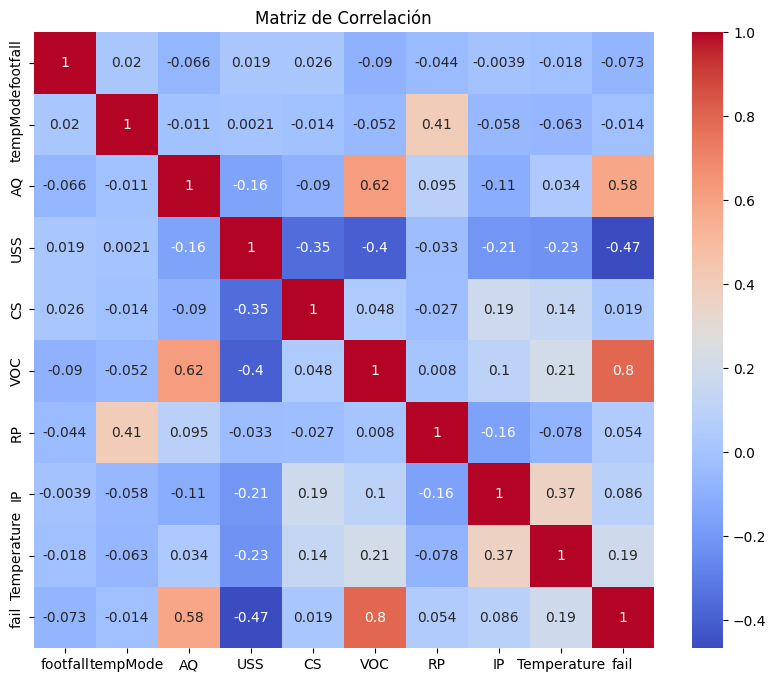

In [ ]:
#Visualización de Matriz de Correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Diagrama de torta de "Fail"

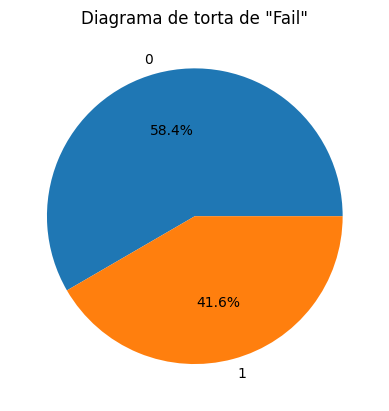

In [ ]:
# Get the value counts of 'fail' column
fail_counts = machine_data['fail'].value_counts()

# Create the pie chart
plt.pie(fail_counts, labels=fail_counts.index, autopct='%1.1f%%')
plt.title('Diagrama de torta de "Fail"')
plt.show()

# Preparar los datos

Podemos observar que la variable "footfall" contiene valores que se encuentran muy alejados de la media, estos valores pueden arrojar medidas equivocadas, eliminemos los outliers, y verifiquemos nuestros datos de nuevo

In [ ]:
def eliminar_outliers_iqr(data, variable):
    """
    Elimina los outliers de una variable en un DataFrame usando el rango intercuartílico (IQR).

    Args:
        data: DataFrame de Pandas que contiene los datos.
        variable: Nombre de la columna (variable) a la que se le eliminarán los outliers.

    Returns:
        DataFrame de Pandas con los outliers eliminados.
    """

    # Calcula los cuartiles Q1 y Q3
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)

    # Calcula el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Define los límites superior e inferior para identificar outliers
    limite_superior = Q3 + 1.5 * IQR
    limite_inferior = Q1 - 1.5 * IQR

    # Filtra el DataFrame para eliminar los outliers
    data_sin_outliers = data[(data[variable] >= limite_inferior) & (data[variable] <= limite_superior)]

    return data_sin_outliers

In [ ]:
data_sin_outliers = eliminar_outliers_iqr(machine_data, 'footfall')

In [ ]:
data_sin_outliers.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
5,110,3,3,4,6,1,21,4,1,0


In [ ]:
data_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     790 non-null    int64
 1   tempMode     790 non-null    int64
 2   AQ           790 non-null    int64
 3   USS          790 non-null    int64
 4   CS           790 non-null    int64
 5   VOC          790 non-null    int64
 6   RP           790 non-null    int64
 7   IP           790 non-null    int64
 8   Temperature  790 non-null    int64
 9   fail         790 non-null    int64
dtypes: int64(10)
memory usage: 67.9 KB


In [ ]:
data_sin_outliers.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,36.220253,3.692405,4.350633,2.874684,5.374684,2.927848,47.302532,4.605063,16.486076,0.437975
std,54.300129,2.674163,1.449564,1.359655,1.244045,2.278151,16.471533,1.608272,5.943475,0.496452
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,3.000000,2.000000,5.000000,1.000000,35.000000,3.000000,14.000000,0.000000
50%,12.500000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,18.000000,0.000000
75%,49.250000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,270.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


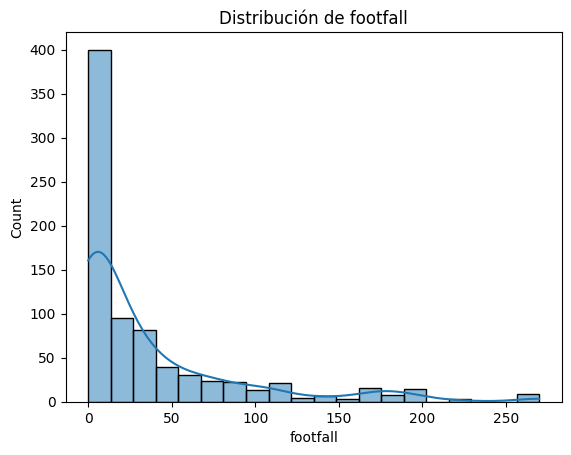

In [ ]:
histograma(data_sin_outliers, 'footfall', 'Distribución de footfall')

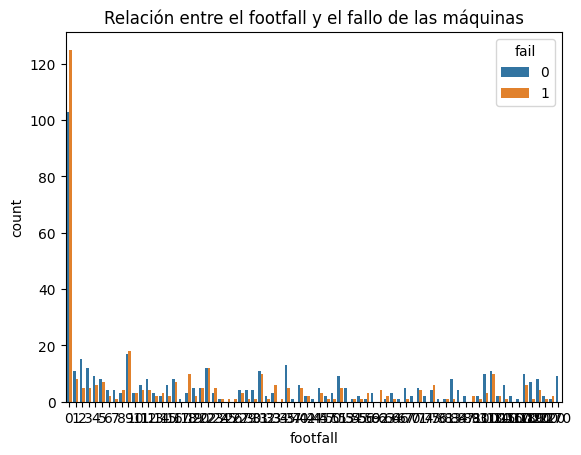

In [ ]:
visualizar_barras(data_sin_outliers, 'footfall', 'Relación entre el footfall y el fallo de las máquinas')

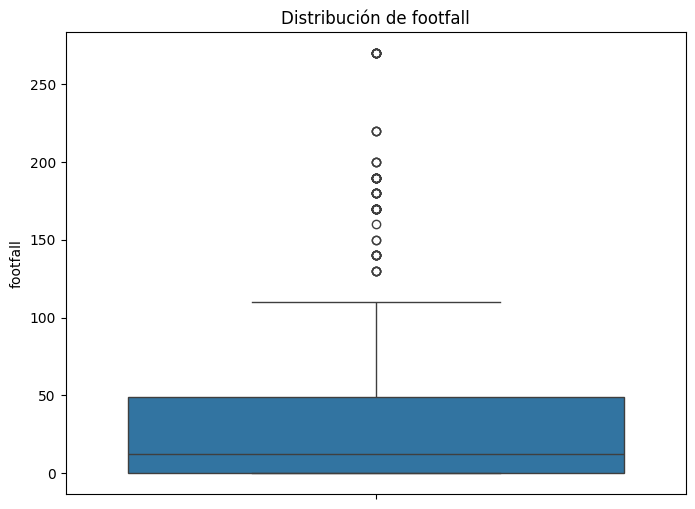

In [ ]:
visualizar_boxplot(data_sin_outliers, 'footfall', 'Distribución de footfall')

Al eliminar los outliers de la variable footfall, nuestro dataset pierde 154 registro, lo cual parece que es mucha información. Para contrarrestrar esta situación, en lugar de eliminar los outliers, haremos una transformación logaritmica a la variable footfall

In [ ]:
# Aplicar transformación logarítmica a la variable 'footfall'
machine_data['footfall_log'] = np.log1p(machine_data['footfall'])

# Dataset con la nueva columna transformada
machine_data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail,footfall_log
0,0,7,7,1,6,6,36,3,1,1,0.000000
1,190,1,3,3,5,1,20,4,1,0,5.252273
2,31,7,2,2,6,1,24,6,1,0,3.465736
3,83,4,3,4,5,1,28,6,1,0,4.430817
4,640,7,5,6,4,0,68,6,1,0,6.463029


In [ ]:
machine_data.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail,footfall_log
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314,3.076478
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208,2.383026
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000,0.693147
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000,3.135494
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000,4.709530
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000,8.895767


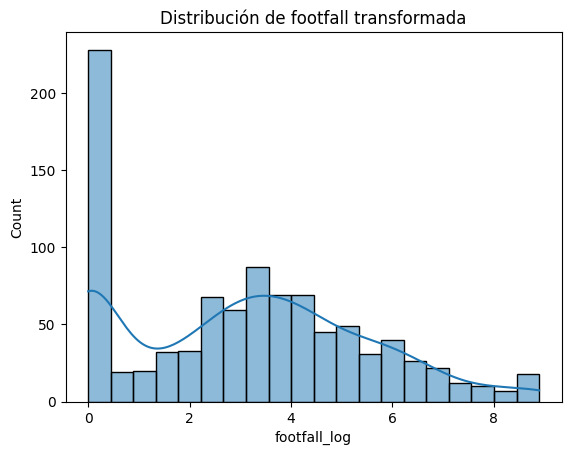

In [ ]:
histograma(machine_data, 'footfall_log', 'Distribución de footfall transformada')

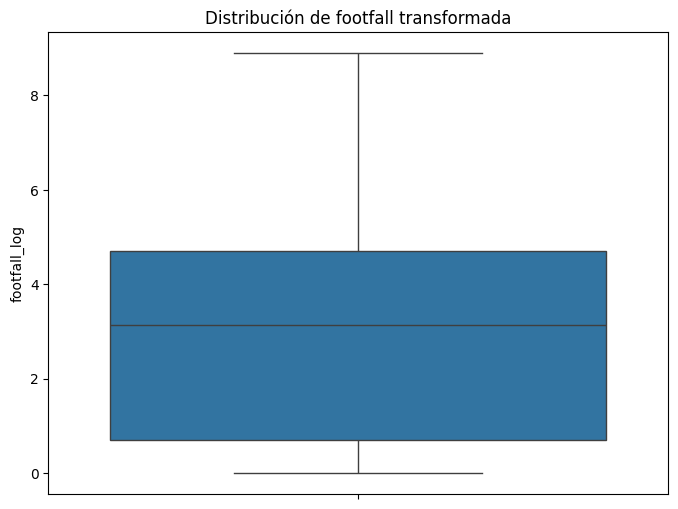

In [ ]:
visualizar_boxplot(machine_data, 'footfall_log', 'Distribución de footfall transformada')

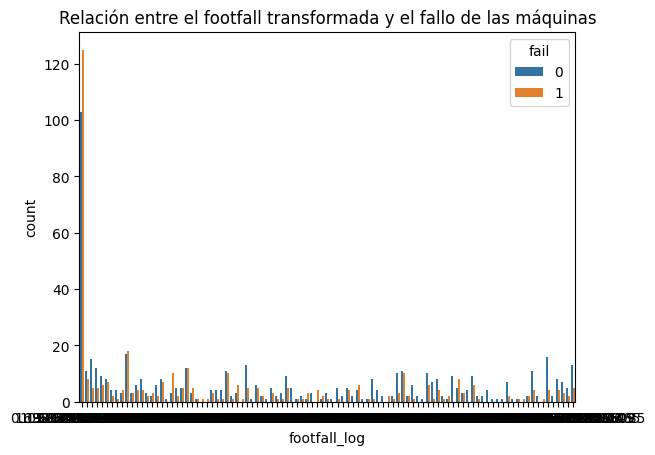

In [ ]:
visualizar_barras(machine_data, 'footfall_log', 'Relación entre el footfall transformada y el fallo de las máquinas')

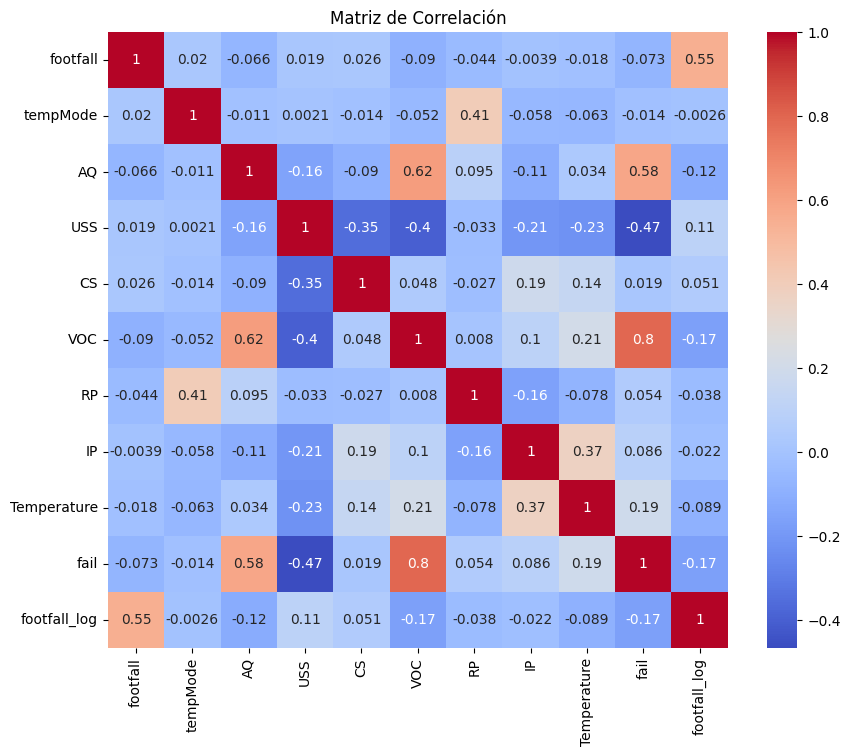

In [ ]:
correlation_matrix = machine_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Feature Scaling

In [ ]:
# Importamos la la función StandardScaler desde la libreria sklearn
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las caracteristicas a escalar

feature_to_scale = ['tempMode',	'AQ',	'USS',	'CS',	'VOC',	'RP',	'IP',	'Temperature','footfall_log']

# Escalar caracteristicas seleccionadas

scaler = MinMaxScaler()
machine_data[feature_to_scale] = scaler.fit_transform(machine_data[feature_to_scale])
machine_data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail,footfall_log
0,0,1.000000,1.000000,0.000000,0.833333,1.000000,0.236111,0.333333,0.0,1,0.000000
1,190,0.142857,0.333333,0.333333,0.666667,0.166667,0.013889,0.500000,0.0,0,0.590424
2,31,1.000000,0.166667,0.166667,0.833333,0.166667,0.069444,0.833333,0.0,0,0.389594
3,83,0.571429,0.333333,0.500000,0.666667,0.166667,0.125000,0.833333,0.0,0,0.498082
4,640,1.000000,0.666667,0.833333,0.500000,0.000000,0.680556,0.833333,0.0,0,0.726529


## Features X vs Target Y

In [ ]:
# Separación de los dataframes en variables características y objetivo

X = machine_data.drop(columns= ['footfall', 'fail'])
y = machine_data['fail']

In [ ]:
X.head()

,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,footfall_log
0,1.000000,1.000000,0.000000,0.833333,1.000000,0.236111,0.333333,0.0,0.000000
1,0.142857,0.333333,0.333333,0.666667,0.166667,0.013889,0.500000,0.0,0.590424
2,1.000000,0.166667,0.166667,0.833333,0.166667,0.069444,0.833333,0.0,0.389594
3,0.571429,0.333333,0.500000,0.666667,0.166667,0.125000,0.833333,0.0,0.498082
4,1.000000,0.666667,0.833333,0.500000,0.000000,0.680556,0.833333,0.0,0.726529


In [ ]:
y.head()

,fail
0,1
1,0
2,0
3,0
4,0


## Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

#Dividir los datos en conjuntos de entrenamiento y pruebas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)

X_selected = fit.transform(X_train)

# Entrenamiento de Modelos de Machine Learning

## Importar los modelos de clasificación y métricas a utilizar

In [ ]:
# Importamos diferentes modelos de clasificación

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Importamos métricas

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

## Definir listas de variables a utilizar

In [ ]:
# Entrenamos y evaluamos todos los modelos
# Crear listas para almacenar resultados

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Naive Bayes']
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

## Definir los modelos de Machine Learning a utilizar

In [ ]:
# Definir modelos

LogisticRegression_model = LogisticRegression()
DecisionTree_model = DecisionTreeClassifier()
RandomForest_model = RandomForestClassifier()
GradientBoosting_model = GradientBoostingClassifier()
SVM_model = SVC()
KNN_model = KNeighborsClassifier()
NaiveBayes_model = GaussianNB()

In [ ]:
# Lista de modelos

models_list = [LogisticRegression_model, DecisionTree_model, RandomForest_model,\
  GradientBoosting_model, SVM_model, KNN_model, NaiveBayes_model]

## Entranamiento de cada modelos utilizando validación cruzada

In [ ]:
# Entrenar y evaluar cada modelo utilizando validación cruzada

for model in models_list:
  accuracy_scores.append(cross_val_score(model, X_train, y_train, scoring= 'accuracy', cv=5).mean())
  precision_scores.append(cross_val_score(model, X_train, y_train, scoring= 'precision', cv=5).mean())
  recall_scores.append(cross_val_score(model, X_train, y_train, scoring= 'recall', cv=5).mean())
  f1_scores.append(cross_val_score(model, X_train, y_train, scoring= 'f1', cv=5).mean())
  roc_auc_scores.append(cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv=5).mean())

## Resultado de las métricas correspondiente a cada modelo entrenado

In [ ]:
# Crear Data Frame con los resultados

results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'ROC AUC Score': roc_auc_scores
})

In [ ]:
# Mostrar los resultados

print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0  Logistic Regression  0.917881   0.891807  0.908620  0.899761       0.971174
1        Decision Tree  0.849007   0.805488  0.813802  0.819353       0.843496
2        Random Forest  0.916556   0.896882  0.895452  0.897724       0.966602
3    Gradient Boosting  0.912583   0.892640  0.892226  0.890494       0.965332
4                  SVM  0.913907   0.893093  0.895505  0.894051       0.969142
5                  KNN  0.907285   0.865213  0.915177  0.889214       0.951058
6          Naive Bayes  0.921854   0.905897  0.902221  0.903134       0.964696


Los modelos que arrojaron mejores resultados fueron:


1.   Naive Bayes
2.   Logistic Regression
3.   Random Forest



# Ajuste de Hiperparámetros y optimización

Probaremos ajustar los hiperparámetros, para visualizar si se puede mejorar la precisión de los modelos pre-seleccionados.

## Naive Bayes

In [ ]:
#Valores de prueba
param_grid_nb = {'var_smoothing' : [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}
grid_search_nb = GridSearchCV(NaiveBayes_model, param_grid_nb, cv=10, scoring = 'accuracy')
grid_search_nb.fit(X_train, y_train)
best_nb_params = grid_search_nb.best_params_
print('El mejor parámetro encontrado es:', best_nb_params)

El mejor parámetro encontrado es: {'var_smoothing': 1e-09}


In [ ]:
best_nb_params = grid_search_nb.best_estimator_
best_nb_params

GaussianNB()

In [ ]:
# Entrenamiento con los mejores parámetros encontrados

nb_best = GaussianNB(var_smoothing = 1e-09)
nb_best.fit(X_train, y_train)
y_pred_nb = nb_best.predict(X_test)

accuracy_score(y_test, y_pred_nb)

0.873015873015873

In [ ]:
# Ahora con F1 Score

f1_score(y_test, y_pred_nb)

0.8681318681318682

## Logistic Regression

In [ ]:
#Valores de prueba
param_grid_lr = {'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], \
                 'penalty' : ['l1', 'l2', 'elasticnet', 'none'], \
                 'max_iter' : [100, 300, 500, 700, 900, 1000], 'tol' : [1e-5, 1e-4, 1e-3, 1e-2]}
grid_search_lr = GridSearchCV(LogisticRegression_model, param_grid_lr, cv=5, scoring = 'accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr_params = grid_search_lr.best_params_
print('El mejor parámetro encontrado es:', best_lr_params)

El mejor parámetro encontrado es: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.01}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_

In [ ]:
best_lr_estimator = grid_search_lr.best_estimator_
best_lr_estimator

LogisticRegression(C=1, tol=0.01)

In [ ]:
# Entrenamiento con los mejores parámetros encontrados

lr_best = LogisticRegression(C= 1, max_iter= 100, penalty= 'l2', tol= 0.01)
lr_best.fit(X_train, y_train)
y_pred_lr = lr_best.predict(X_test)

accuracy_score(y_test, y_pred_lr)

0.8835978835978836

In [ ]:
# Ahora con F1 Score

f1_score(y_test, y_pred_lr)

0.8777777777777778

## Random Forest

In [ ]:
#Valores de prueba
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'criterion': ['gini'],
    'n_jobs': [-1],
    'random_state': [42]
}
grid_search_rf = GridSearchCV(RandomForest_model, param_grid_rf, cv=10, scoring = 'accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_params = grid_search_rf.best_params_
print('El mejor parámetro encontrado es:', best_rf_params)

El mejor parámetro encontrado es: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 42}


In [ ]:
best_rf_estimator = grid_search_rf.best_estimator_
best_rf_estimator

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# Entrenamiento con los mejores parámetros encontrados

rf_best = RandomForestClassifier(bootstrap= True, criterion= 'gini',\
                             max_depth= 10, max_features= 'sqrt',\
                             min_samples_leaf= 2, min_samples_split= 5,\
                             n_estimators= 200, n_jobs= -1, random_state= 42)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.8835978835978836

In [ ]:
# Ahora con F1 Score

f1_score(y_test, y_pred_lr)

0.8777777777777778

## Comparacion de métricas para los modelos seleccionados con los nuevos parámetros

In [ ]:
# Creamos listas para almacenar los valores obtenidos

models_best = ['Naive Bayes','Logistic Regression', 'Random Forest']
models_list_best = [nb_best, lr_best, rf_best]


accuracy_scores_best = []
precision_scores_best = []
recall_scores_best = []
f1_scores_best = []
roc_auc_scores_best = []



In [ ]:
# Entrenamos los modelos utilizando el Cross Validation y obteniendo las nuevas
# métricas asociadas a cada modelo

for model_best in models_list_best:
  accuracy_scores_best.append(cross_val_score(model_best, X_train, y_train, scoring= 'accuracy', cv=5).mean())
  precision_scores_best.append(cross_val_score(model_best, X_train, y_train, scoring= 'precision', cv=5).mean())
  recall_scores_best.append(cross_val_score(model_best, X_train, y_train, scoring= 'recall', cv=5).mean())
  f1_scores_best.append(cross_val_score(model_best, X_train, y_train, scoring= 'f1', cv=5).mean())
  roc_auc_scores_best.append(cross_val_score(model_best, X_train, y_train, scoring= 'roc_auc', cv=5).mean())

In [ ]:
# Crear Data Frame con los resultados

results_df_best = pd.DataFrame({
    'Model': models_best,
    'Accuracy': accuracy_scores_best,
    'Precision': precision_scores_best,
    'Recall': recall_scores_best,
    'F1 Score': f1_scores_best,
    'ROC AUC Score': roc_auc_scores_best
})

In [ ]:
# Mostrar los resultados

print(results_df_best)

                 Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0          Naive Bayes  0.921854   0.905897  0.902221  0.903134       0.964696
1  Logistic Regression  0.919205   0.897755  0.905288  0.901111       0.970810
2        Random Forest  0.911258   0.887515  0.895505  0.891355       0.967621


In [ ]:
# Resultados del primer Dataframe

comparar_df = results_df.iloc[[6, 0, 2]]
comparar_df = comparar_df.reset_index(drop=True)
print(comparar_df)

                 Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0          Naive Bayes  0.921854   0.905897  0.902221  0.903134       0.964696
1  Logistic Regression  0.917881   0.891807  0.908620  0.899761       0.971174
2        Random Forest  0.916556   0.896882  0.895452  0.897724       0.966602


In [ ]:
# Diferencias entre los modelos entrenados con sus parámetros por defecto
# y entrenados con sus parametros optimizados

numerical_columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
Diferencias_df = results_df_best[numerical_columns] - comparar_df[numerical_columns]
Diferencias_df.insert(0, 'Model', ['Naive Bayes' , 'Logistic Regression', 'Random Forest'])

print(Diferencias_df)

                 Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0          Naive Bayes  0.000000   0.000000  0.000000   0.00000       0.000000
1  Logistic Regression  0.001325   0.005948 -0.003332   0.00135      -0.000364
2        Random Forest -0.005298  -0.009367  0.000053  -0.00637       0.001019


De acuerdo con el DataFrame *Diferencias_df* que muestra como mejoraron los modelos entrenados con parámetros optimizados, se puede observar que para **Naive Bayes** el mejor modelo es con sus parámetros por defecto, para **Logistic Regression** en 3 de las 5 métricas evaluadas, aumento la precisión de sus resultados, mientras que para **Random Forest** la precisión con las nuevas métricas disminuyó, pudiendo significar que con estos nuevos parámetros se condujo al modelo a un ajuste inapropiado.

##Matriz de Confusión aplicada a los datos de Train y Test

In [ ]:
# Matriz de confusión para evaluar el modelo seleccionado con los datos de train

test_size = len(X_test)
train_sample = X_train.sample(n=test_size, random_state=42)
y_train_sample = y_train.loc[train_sample.index]
y_train_nb = nb_best.predict(train_sample)
confusion_matrix(y_train_sample, y_train_nb)



array([[99, 11],
       [ 5, 74]])

In [ ]:
# Matriz de confusión para evaluar el modelo seleccionado con los datos de test

y_pred_nb = nb_best.predict(X_test)
confusion_matrix(y_test, y_pred_nb)

array([[86, 16],
       [ 8, 79]])

Las matrices de confusión derivadas de los entrenamientos de nuestro modelo de Machine Learning seleccionado, Naive Bayes, indican que el mismo se ha ajustado correctamente a los datos, por lo que no existe Overfitting, ni Underfitting, lo que lo convierte en un modelo confiable para colocarlo en proceso.

##Reducción de la Dimensionalidad

Con la finalidad de verificar si nuestro modelo seleccionado, puede mejorar su rendimiento, intentaremos reducir su dimensionalidad

In [ ]:
from sklearn.decomposition import PCA

# Crear objeto PCA sin reducir
pca_full = PCA()
pca_full.fit(X_train)

# Obtener varianza explicada por cada componente
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)  # Suma acumulativa


# Mostrar varianza explicada por cada componente
for i, var in enumerate(cumulative_var):
    print(f"Componente {i+1}: {var:.2%} de la varianza acumulada")


Componente 1: 26.94% de la varianza acumulada
Componente 2: 48.83% de la varianza acumulada
Componente 3: 63.29% de la varianza acumulada
Componente 4: 73.25% de la varianza acumulada
Componente 5: 80.85% de la varianza acumulada
Componente 6: 86.99% de la varianza acumulada
Componente 7: 92.42% de la varianza acumulada
Componente 8: 96.54% de la varianza acumulada
Componente 9: 100.00% de la varianza acumulada


Gráficamente

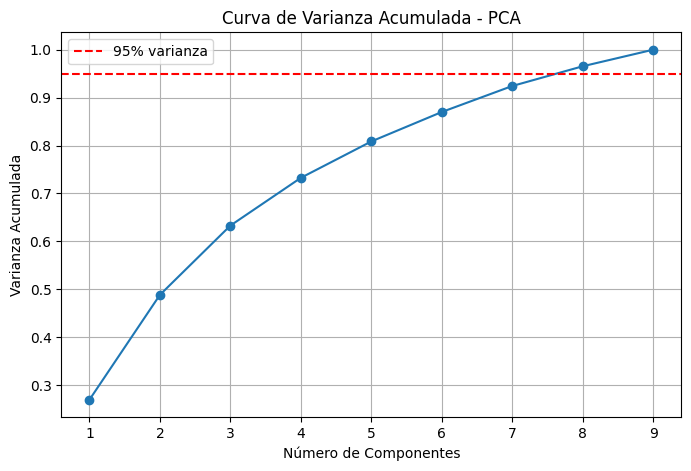

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Curva de Varianza Acumulada - PCA')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.grid(True)
plt.legend()
plt.show()

La gráfica muestra que 8 elementos acumulan el 95% de la varianza

In [ ]:
pca = PCA(n_components=8)  # Queremos reducir a 8 dimensiones
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Printamos cuanta información conservamos
print(pca.explained_variance_ratio_)

[0.26938728 0.21888438 0.14458699 0.09968804 0.07595367 0.06144352
 0.05427791 0.04120488]


Ahora entrenamos de nuevo nuestro modelo seleccionado con estas nuevas caracteristicas reducidas

In [ ]:
nb_pca = GaussianNB(var_smoothing = 1e-09)
nb_pca.fit(X_train_pca, y_train)
y_pred_nb_pca = nb_pca.predict(X_test_pca)

#Evaluación del modelo
print('Accuracy:', accuracy_score(y_test, y_pred_nb_pca))
print('f1_score:', f1_score(y_test, y_pred_nb_pca))

Accuracy: 0.8571428571428571
f1_score: 0.850828729281768


Naive Bayes entrenado con las dimensiones transformadas, no mejora el modelo original, por lo que nos quedaremos con todas sus dimensiones originales.

# Conclusiones

El modelo de Naive Bayes tiene los mejores indices de accuracy, precision y F1 score, significando esto que entre los tres modelos finalistas es el que ofrece mejor precisión y balance general, además cuenta con un ROC AUC de 0,965 lo que indica que es bueno separando las clases objetivo. Sí a lo anterior añadimos que el modelo de Naive Bayes entrena y predice más rápido pudiendo manejar volumenes de datos grandes, tenemos que el modelo de Naive Bayes es el indicado a utilizar para predecir la falla de máquinas.

In [ ]:
# Guardar nuestro modelo seleccionado

import pickle

filename = 'model_machine_prediction.sav'
pickle.dump(nb_best, open(filename, 'wb'))